# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URl
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city.replace(' ', '+')}"
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep()
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsiombe
Processing Record 2 of Set 1 | ejura
Processing Record 3 of Set 1 | usinsk
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | boac
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | queenstown
Processing Record 9 of Set 1 | sandnessjoen
Processing Record 10 of Set 1 | grand baie
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | egilsstadir
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | embi
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | waitangi
Processing Record 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = {
                          "City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
}

city_data_df=pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tsiombe,-25.3000,45.4833,71.33,65,0,17.13,MG,1701632405
1,ejura,7.3856,-1.3562,81.21,37,7,4.05,GH,1701632407
2,usinsk,65.9939,57.5281,7.47,96,100,6.82,RU,1701632409
3,adamstown,-25.0660,-130.1015,72.57,83,76,13.71,PN,1701632411
4,ushuaia,-54.8000,-68.3000,49.66,66,100,24.16,AR,1701632412


In [19]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,71.33,65,0,17.13,MG,1701632405
1,ejura,7.3856,-1.3562,81.21,37,7,4.05,GH,1701632407
2,usinsk,65.9939,57.5281,7.47,96,100,6.82,RU,1701632409
3,adamstown,-25.0660,-130.1015,72.57,83,76,13.71,PN,1701632411
4,ushuaia,-54.8000,-68.3000,49.66,66,100,24.16,AR,1701632412


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

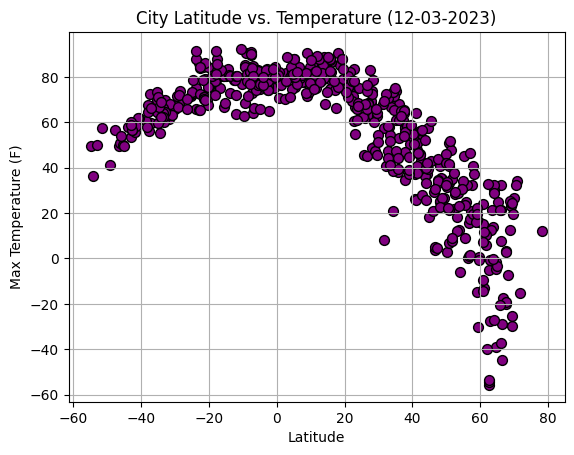

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color = "purple",
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    label = "Cities",
    s = 50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

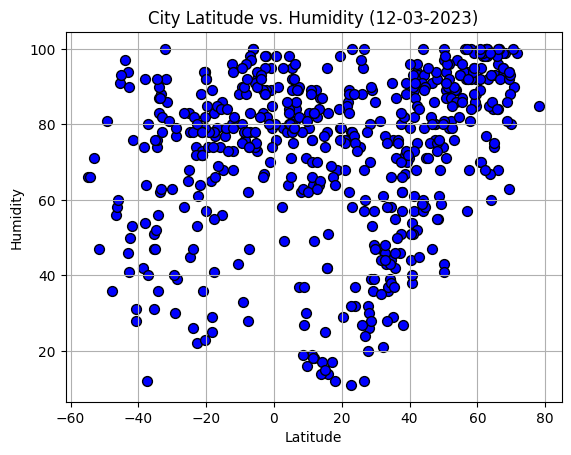

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color = "blue",
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    label = "Cities",
    s = 50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

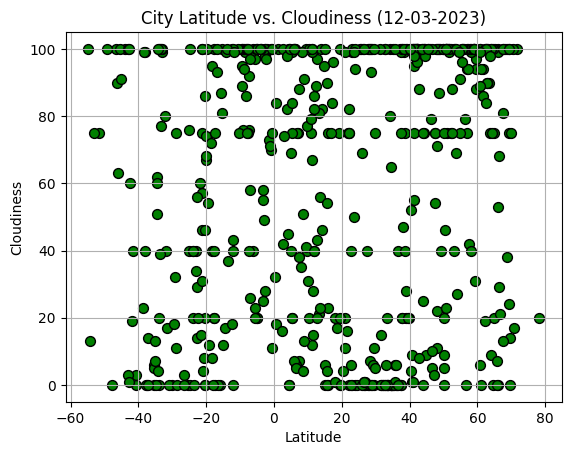

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color = "green",
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    label = "Cities",
    s = 50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

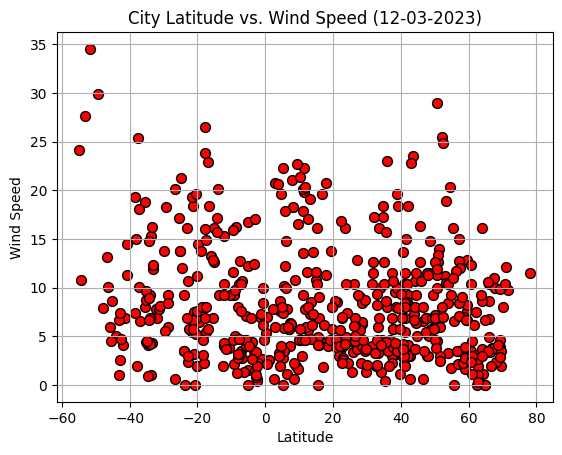

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color = "red",
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    label = "Cities",
    s = 50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values, y_values, color = color, edgecolor = "black", s = 50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "blue")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ejura,7.3856,-1.3562,81.21,37,7,4.05,GH,1701632407
2,usinsk,65.9939,57.5281,7.47,96,100,6.82,RU,1701632409
5,boac,13.4463,121.8400,78.49,87,56,8.50,PH,1701632414
6,olonkinbyen,70.9221,-8.7187,33.96,90,17,12.12,SJ,1701632416
8,sandnessjoen,66.0217,12.6316,21.31,68,0,10.36,NO,1701632420


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,71.33,65,0,17.13,MG,1701632405
3,adamstown,-25.0660,-130.1015,72.57,83,76,13.71,PN,1701632411
4,ushuaia,-54.8000,-68.3000,49.66,66,100,24.16,AR,1701632412
7,queenstown,-31.8976,26.8753,61.21,92,40,6.91,ZA,1701632418
9,grand baie,-20.0182,57.5802,75.67,92,67,1.99,MU,1701632422


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7585795946372662


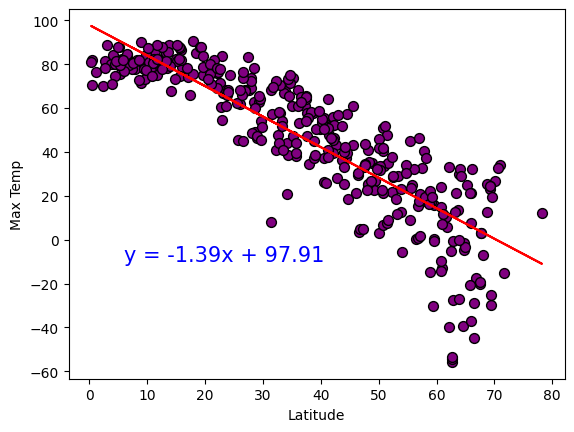

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10), "purple")

The r-value is: 0.5761371679736613


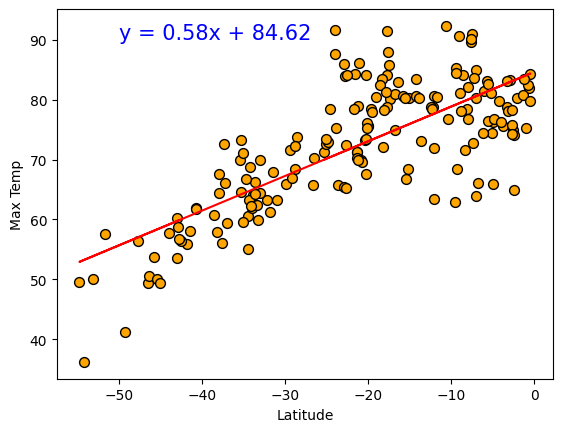

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-50,90), "orange")

**Discussion about the linear relationship:There is a strong correlation between Temp and Latitude in the Northern Hemisphere. The Southern Hemisphere has a weak correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13066993234831314


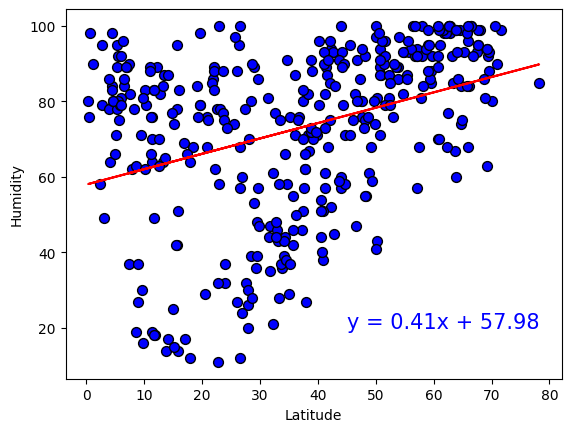

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45,20), "blue")

The r-value is: 0.11858985954744455


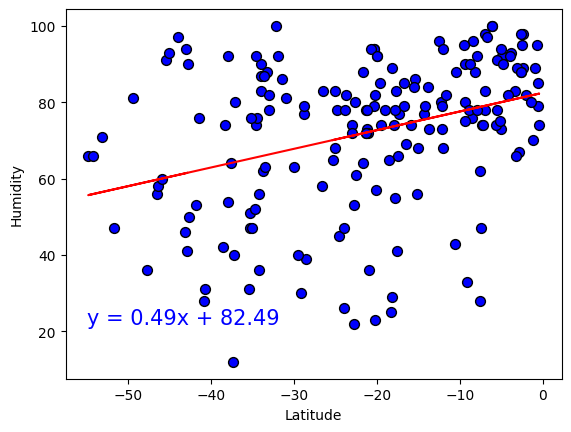

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,22), "blue")

**Discussion about the linear relationship:** Both in the Northern and Southern there is virtually no correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.032554885934879166


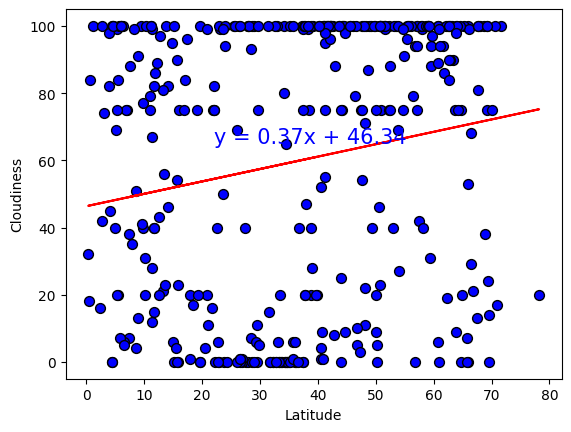

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (22,65), "blue")

The r-value is: 0.06239716506693296


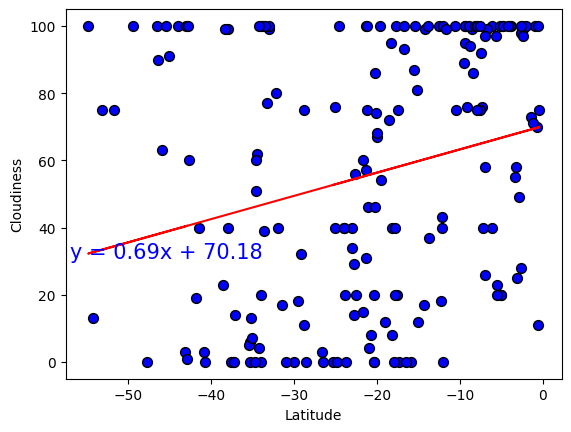

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-57,31), "blue")

**Discussion about the linear relationship:** There is virtualy no correlation between Latitude and Cloudiness in both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01230976615830725


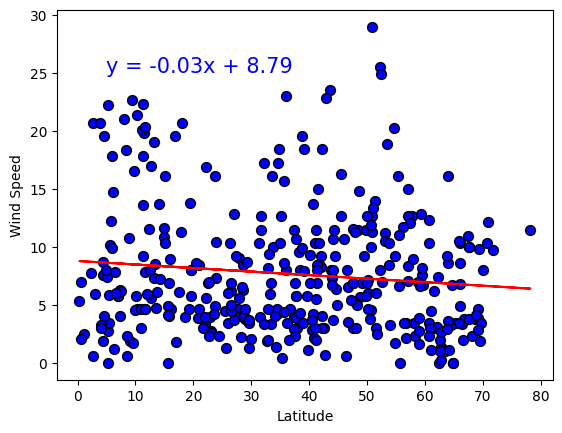

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (5,25), "blue")

The r-value is: 0.08125857220939035


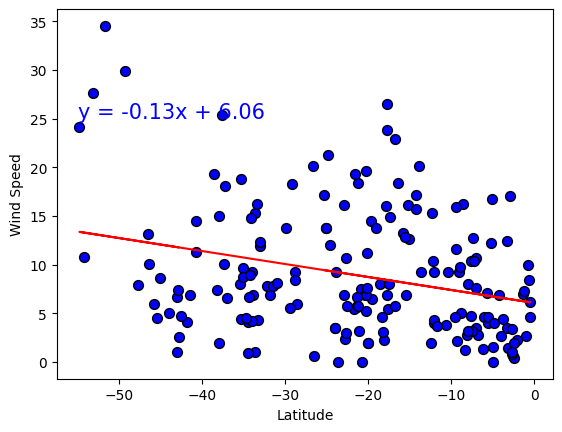

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-55,25), "blue")

**Discussion about the linear relationship:** In the Northern Hemisphere there is no correlation between Latitude and Wind Speed. In the Southern Hemisphere there is a very weak correlation.